## Install libraries and models

In [1]:
# install >= 3.0.1 spacy version
!pip install spacy==3.0.1

# install scispacy
!pip install scispacy

# install models
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_craft_md-0.4.0.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_jnlpba_md-0.4.0.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bionlp13cg_md-0.4.0.tar.gz

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_craft_md-0.4.0.tar.gz (125.1 MB)
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_jnlpba_md-0.4.0.tar.gz (125.1 MB)
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz (125.1 MB)
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bionlp13cg_md-0.4.0.tar.gz (125.1 MB)


In [2]:
from google.colab import drive

drive.mount('/content/drive')

DATA_PATH = '/content/drive/My Drive/my_colab/litcoin/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing libraries

In [3]:
# essentials
import pandas as pd
import numpy as np

# spacy
import scispacy
import spacy

# display results
from spacy import displacy

# scispacy models
import en_ner_craft_md
import en_ner_jnlpba_md
import en_ner_bc5cdr_md
import en_ner_bionlp13cg_md

# utility
from collections import OrderedDict
from pprint import pprint

# surpress warnings
import warnings
warnings.filterwarnings('ignore')

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data

In [4]:
  # Note: this path will be different depending on where you store the dataset
data_path = DATA_PATH

# Load training datasets
abstracts_train = pd.read_csv(data_path + 'abstracts_train.csv', sep='\t')
entities_train = pd.read_csv(data_path + 'entities_train.csv', sep='\t')

# Load test data
abstracts_test = pd.read_csv(data_path + 'abstracts_test.csv', sep='\t')

In [5]:
abstracts_train.head()

,abstract_id,title,abstract
0,1353340,Late-onset metachromatic leukodystrophy: molec...,We report on a new allele at the arylsulfatase...
1,1671881,Two distinct mutations at a single BamHI site ...,Classical phenylketonuria is an autosomal rece...
2,1848636,Debrisoquine phenotype and the pharmacokinetic...,The metabolism of the cardioselective beta-blo...
3,2422478,Midline B3 serotonin nerves in rat medulla are...,Previous experiments in this laboratory have s...
4,2491010,Molecular and phenotypic analysis of patients ...,Eighty unrelated individuals with Duchenne mus...


In [6]:
entities_train.head()

,id,abstract_id,offset_start,offset_finish,type,mention,entity_ids
0,0,1353340,11,39,DiseaseOrPhenotypicFeature,metachromatic leukodystrophy,D007966
1,1,1353340,111,126,GeneOrGeneProduct,arylsulfatase A,410
2,2,1353340,128,132,GeneOrGeneProduct,ARSA,410
3,3,1353340,159,187,DiseaseOrPhenotypicFeature,metachromatic leukodystrophy,D007966
4,4,1353340,189,192,DiseaseOrPhenotypicFeature,MLD,D007966


In [7]:
abstracts_test.head()

,abstract_id,title,abstract
0,1711760,Delayed institution of hypertension during foc...,The effect of induced hypertension instituted ...
1,6086495,Localisation of the Becker muscular dystrophy ...,A linkage study in 30 Becker muscular dystroph...
2,7018927,Pituitary response to luteinizing hormone-rele...,The effects of a 6-hour infusion with haloperi...
3,7811247,X-linked adrenoleukodystrophy (ALD): a novel m...,Fragments of the adrenoleukodystrophy (ALD) cD...
4,8944024,Detection of heterozygous mutations in BRCA1 u...,The ability to scan a large gene rapidly and a...


### How many types are there?

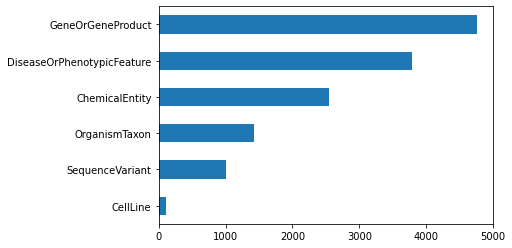

In [8]:
entities_train['type'].value_counts().plot(kind="barh").invert_yaxis();

### Use models

In [9]:
text = abstracts_train.iloc[0].title + abstracts_train.iloc[0].abstract
len(text)

717

In [10]:
text

'Late-onset metachromatic leukodystrophy: molecular pathology in two siblings.We report on a new allele at the arylsulfatase A (ARSA) locus causing late-onset metachromatic leukodystrophy (MLD). In that allele arginine84, a residue that is highly conserved in the arylsulfatase gene family, is replaced by glutamine. In contrast to alleles that cause early-onset MLD, the arginine84 to glutamine substitution is associated with some residual ARSA activity. A comparison of genotypes, ARSA activities, and clinical data on 4 individuals carrying the allele of 81 patients with MLD examined, further validates the concept that different degrees of residual ARSA activity are the basis of phenotypical variation in MLD.. '

In [11]:
nlp_bionlp13cg = en_ner_bionlp13cg_md.load()
nlp_craft = en_ner_craft_md.load()
nlp_jnlpba = en_ner_jnlpba_md.load()
nlp_bc5cdr = en_ner_bc5cdr_md.load()

doc_bionlp13cg = nlp_bionlp13cg(text)
doc_craft = nlp_craft(text)
doc_jnlpba = nlp_jnlpba(text)
doc_bc5cdr= nlp_bc5cdr(text)

In [12]:
pprint({(X.text, X.label_, X.start_char, X.end_char) for X in doc_bionlp13cg.ents})

{('ARSA', 'GENE_OR_GENE_PRODUCT', 441, 445),
 ('ARSA', 'GENE_OR_GENE_PRODUCT', 483, 487),
 ('ARSA', 'GENE_OR_GENE_PRODUCT', 654, 658),
 ('ARSA)', 'GENE_OR_GENE_PRODUCT', 127, 132),
 ('MLD', 'CANCER', 188, 191),
 ('MLD', 'GENE_OR_GENE_PRODUCT', 362, 365),
 ('MLD', 'GENE_OR_GENE_PRODUCT', 575, 578),
 ('MLD', 'GENE_OR_GENE_PRODUCT', 711, 714),
 ('arginine84', 'GENE_OR_GENE_PRODUCT', 209, 219),
 ('arginine84', 'GENE_OR_GENE_PRODUCT', 371, 381),
 ('arylsulfatase', 'GENE_OR_GENE_PRODUCT', 263, 276),
 ('arylsulfatase A', 'GENE_OR_GENE_PRODUCT', 110, 125),
 ('glutamine', 'AMINO_ACID', 305, 314),
 ('glutamine', 'AMINO_ACID', 385, 394),
 ('individuals', 'ORGANISM', 523, 534),
 ('patients', 'ORGANISM', 561, 569)}


In [13]:
displacy.render(doc_bionlp13cg, jupyter=True, style='ent')

In [14]:
displacy.render(doc_craft, jupyter=True, style='ent')

In [15]:
displacy.render(doc_jnlpba, jupyter=True, style='ent')

In [16]:
displacy.render(doc_bc5cdr, jupyter=True, style='ent')

In [17]:
data_doc_bionlp13cg = [(X.text, X.label_, X.start_char, X.end_char) for X in doc_bionlp13cg.ents]
data_doc_craft = [(X.text, X.label_, X.start_char, X.end_char) for X in doc_craft.ents]
data_doc_bc5cdr = [(X.text, X.label_, X.start_char, X.end_char) for X in doc_bc5cdr.ents]
data_doc_jnlpba = [(X.text, X.label_, X.start_char, X.end_char) for X in doc_jnlpba.ents]

data = data_doc_bionlp13cg + data_doc_craft + data_doc_bc5cdr + data_doc_jnlpba
data

[('arylsulfatase A', 'GENE_OR_GENE_PRODUCT', 110, 125),
 ('ARSA)', 'GENE_OR_GENE_PRODUCT', 127, 132),
 ('MLD', 'CANCER', 188, 191),
 ('arginine84', 'GENE_OR_GENE_PRODUCT', 209, 219),
 ('arylsulfatase', 'GENE_OR_GENE_PRODUCT', 263, 276),
 ('glutamine', 'AMINO_ACID', 305, 314),
 ('MLD', 'GENE_OR_GENE_PRODUCT', 362, 365),
 ('arginine84', 'GENE_OR_GENE_PRODUCT', 371, 381),
 ('glutamine', 'AMINO_ACID', 385, 394),
 ('ARSA', 'GENE_OR_GENE_PRODUCT', 441, 445),
 ('ARSA', 'GENE_OR_GENE_PRODUCT', 483, 487),
 ('individuals', 'ORGANISM', 523, 534),
 ('patients', 'ORGANISM', 561, 569),
 ('MLD', 'GENE_OR_GENE_PRODUCT', 575, 578),
 ('ARSA', 'GENE_OR_GENE_PRODUCT', 654, 658),
 ('MLD', 'GENE_OR_GENE_PRODUCT', 711, 714),
 ('molecular', 'CHEBI', 41, 50),
 ('allele', 'SO', 96, 102),
 ('arylsulfatase A', 'GGP', 110, 125),
 ('locus', 'SO', 133, 138),
 ('allele', 'SO', 202, 208),
 ('conserved', 'SO', 246, 255),
 ('arylsulfatase gene', 'GGP', 263, 281),
 ('replaced', 'SO', 293, 301),
 ('glutamine', 'CHEBI', 30

In [18]:
attrs = ["text", "label_", "start_char", "end_char"]
temp_df = pd.DataFrame(data, columns=attrs)
temp_df.head(10)

,text,label_,start_char,end_char
0,arylsulfatase A,GENE_OR_GENE_PRODUCT,110,125
1,ARSA),GENE_OR_GENE_PRODUCT,127,132
2,MLD,CANCER,188,191
3,arginine84,GENE_OR_GENE_PRODUCT,209,219
4,arylsulfatase,GENE_OR_GENE_PRODUCT,263,276
5,glutamine,AMINO_ACID,305,314
6,MLD,GENE_OR_GENE_PRODUCT,362,365
7,arginine84,GENE_OR_GENE_PRODUCT,371,381
8,glutamine,AMINO_ACID,385,394
9,ARSA,GENE_OR_GENE_PRODUCT,441,445


In [19]:
temp_train_df = entities_train.query('abstract_id == 1353340')
temp_train_df.head(10)

,id,abstract_id,offset_start,offset_finish,type,mention,entity_ids
0,0,1353340,11,39,DiseaseOrPhenotypicFeature,metachromatic leukodystrophy,D007966
1,1,1353340,111,126,GeneOrGeneProduct,arylsulfatase A,410
2,2,1353340,128,132,GeneOrGeneProduct,ARSA,410
3,3,1353340,159,187,DiseaseOrPhenotypicFeature,metachromatic leukodystrophy,D007966
4,4,1353340,189,192,DiseaseOrPhenotypicFeature,MLD,D007966
5,5,1353340,210,220,SequenceVariant,arginine84,rs74315458
6,6,1353340,264,277,GeneOrGeneProduct,arylsulfatase,410
7,7,1353340,363,366,DiseaseOrPhenotypicFeature,MLD,D007966
8,8,1353340,372,395,SequenceVariant,arginine84 to glutamine,rs74315458
9,9,1353340,442,446,GeneOrGeneProduct,ARSA,410


In [20]:
merged_df = temp_df.merge(temp_train_df, how = 'inner', left_on ='text', right_on = 'mention')
merged_df[['text', 'label_', 'type']].drop_duplicates()

,text,label_,type
0,arylsulfatase A,GENE_OR_GENE_PRODUCT,GeneOrGeneProduct
1,arylsulfatase A,GGP,GeneOrGeneProduct
2,MLD,CANCER,DiseaseOrPhenotypicFeature
6,MLD,GENE_OR_GENE_PRODUCT,DiseaseOrPhenotypicFeature
18,MLD,DISEASE,DiseaseOrPhenotypicFeature
34,arginine84,GENE_OR_GENE_PRODUCT,SequenceVariant
36,arginine84,PROTEIN,SequenceVariant
37,arylsulfatase,GENE_OR_GENE_PRODUCT,GeneOrGeneProduct
38,ARSA,GENE_OR_GENE_PRODUCT,GeneOrGeneProduct
50,ARSA,GGP,GeneOrGeneProduct


In [21]:
temp_df.label_.unique()

array(['GENE_OR_GENE_PRODUCT', 'CANCER', 'AMINO_ACID', 'ORGANISM',
       'CHEBI', 'SO', 'GGP', 'TAXON', 'DISEASE', 'CHEMICAL', 'DNA',
       'PROTEIN'], dtype=object)

In [22]:
temp_train_df.type.unique()

array(['DiseaseOrPhenotypicFeature', 'GeneOrGeneProduct',
       'SequenceVariant', 'OrganismTaxon'], dtype=object)

In [23]:
temp_df.label_ = temp_df.label_.map(
    {
        "GENE_OR_GENE_PRODUCT": "GeneOrGeneProduct",
        "GGP": "GeneOrGeneProduct",
        "ORGANISM": "OrganismTaxon",
        "CANCER": "DiseaseOrPhenotypicFeature",
        "DISEASE": "DiseaseOrPhenotypicFeature",
        "CHEBI": "ChemicalEntity",
        "CHEMICAL": "ChemicalEntity",
        "PROTEIN": "SequenceVariant",
        "AMINO_ACID": "SequenceVariant",
        "SO": "SO",
        "TAXON": "TAXON",
        "DNA": "DNA",
    }
)

In [24]:
temp_df.head()

,text,label_,start_char,end_char
0,arylsulfatase A,GeneOrGeneProduct,110,125
1,ARSA),GeneOrGeneProduct,127,132
2,MLD,DiseaseOrPhenotypicFeature,188,191
3,arginine84,GeneOrGeneProduct,209,219
4,arylsulfatase,GeneOrGeneProduct,263,276


In [25]:
temp_df['start_char'] = temp_df['start_char'] + 1

In [26]:
temp_df['end_char'] = temp_df['end_char'] + 1

In [27]:
temp_df.text = temp_df.text.str.replace(')', '')

In [28]:
type_list = entities_train['type'].unique().tolist()
type_list

['DiseaseOrPhenotypicFeature',
 'GeneOrGeneProduct',
 'SequenceVariant',
 'OrganismTaxon',
 'ChemicalEntity',
 'CellLine']

In [29]:
temp_df = temp_df.loc[temp_df['label_'].isin(type_list)]
temp_df.head()

,text,label_,start_char,end_char
0,arylsulfatase A,GeneOrGeneProduct,111,126
1,ARSA,GeneOrGeneProduct,128,133
2,MLD,DiseaseOrPhenotypicFeature,189,192
3,arginine84,GeneOrGeneProduct,210,220
4,arylsulfatase,GeneOrGeneProduct,264,277


In [30]:
temp_df = temp_df.sort_values(by=['start_char'])
temp_df = temp_df.drop_duplicates()
temp_df.head(20)

,text,label_,start_char,end_char
31,Late-onset metachromatic leukodystrophy,DiseaseOrPhenotypicFeature,1,40
16,molecular,ChemicalEntity,42,51
18,arylsulfatase A,GeneOrGeneProduct,111,126
1,ARSA,GeneOrGeneProduct,128,133
32,late-onset metachromatic leukodystrophy,DiseaseOrPhenotypicFeature,148,187
33,MLD,DiseaseOrPhenotypicFeature,189,192
3,arginine84,GeneOrGeneProduct,210,220
4,arylsulfatase,GeneOrGeneProduct,264,277
22,arylsulfatase gene,GeneOrGeneProduct,264,282
24,glutamine,ChemicalEntity,306,315


In [31]:
temp_train_df

,id,abstract_id,offset_start,offset_finish,type,mention,entity_ids
0,0,1353340,11,39,DiseaseOrPhenotypicFeature,metachromatic leukodystrophy,D007966
1,1,1353340,111,126,GeneOrGeneProduct,arylsulfatase A,410
2,2,1353340,128,132,GeneOrGeneProduct,ARSA,410
3,3,1353340,159,187,DiseaseOrPhenotypicFeature,metachromatic leukodystrophy,D007966
4,4,1353340,189,192,DiseaseOrPhenotypicFeature,MLD,D007966
5,5,1353340,210,220,SequenceVariant,arginine84,rs74315458
6,6,1353340,264,277,GeneOrGeneProduct,arylsulfatase,410
7,7,1353340,363,366,DiseaseOrPhenotypicFeature,MLD,D007966
8,8,1353340,372,395,SequenceVariant,arginine84 to glutamine,rs74315458
9,9,1353340,442,446,GeneOrGeneProduct,ARSA,410


In [46]:
class NerModel:
  def __init__(self, nlp_bionlp13cg, nlp_craft, nlp_jnlpba, nlp_bc5cdr, type_set):
    self.nlp_bionlp13cg = nlp_bionlp13cg  #en_ner_bionlp13cg_md.load()
    self.nlp_craft = nlp_craft  #en_ner_craft_md.load()
    self.nlp_jnlpba = nlp_jnlpba  #en_ner_jnlpba_md.load()
    self.nlp_bc5cdr = nlp_bc5cdr  #en_ner_bc5cdr_md.load()
    self.type_set = type_set
  
  def predict(self, abstract_id, doc):
    doc_bionlp13cg = self.nlp_bionlp13cg(doc)
    doc_craft = self.nlp_craft(doc)
    doc_jnlpba = self.nlp_jnlpba(doc)
    doc_bc5cdr= self.nlp_bc5cdr(doc)
    
    data_doc_bionlp13cg = [(X.text, X.start_char, X.end_char, X.label_ ) for X in doc_bionlp13cg.ents]
    data_doc_craft = [(X.text, X.start_char, X.end_char, X.label_) for X in doc_craft.ents]
    data_doc_bc5cdr = [(X.text, X.start_char, X.end_char, X.label_) for X in doc_bc5cdr.ents]
    data_doc_jnlpba = [(X.text, X.start_char, X.end_char, X.label_) for X in doc_jnlpba.ents]
    
    ner_data = data_doc_bionlp13cg + data_doc_craft + data_doc_bc5cdr + data_doc_jnlpba
    attrs = ["text", "offset_start", "offset_finish", "type"]
    pred_df = pd.DataFrame(ner_data, columns=attrs)
    pred_df['abstact_id'] = abstract_id
    pred_df.type = pred_df.type.map({
        "GENE_OR_GENE_PRODUCT": "GeneOrGeneProduct",
        "GGP": "GeneOrGeneProduct",
        "ORGANISM": "OrganismTaxon",
        "CANCER": "DiseaseOrPhenotypicFeature",
        "DISEASE": "DiseaseOrPhenotypicFeature",
        "CHEBI": "ChemicalEntity",
        "CHEMICAL": "ChemicalEntity",
        "PROTEIN": "SequenceVariant",
        "AMINO_ACID": "SequenceVariant",
        "SO": "SO",
        "TAXON": "TAXON",
        "DNA": "DNA",
    })
    pred_df['offset_start'] = pred_df['offset_start'] + 1
    pred_df['offset_finish'] = pred_df['offset_finish'] + 1
    pred_df.text = pred_df.text.str.replace(')', '')
    pred_df = pred_df.loc[pred_df['type'].isin(self.type_set)]
    pred_df = pred_df.sort_values(by=['offset_start'])
    pred_df = pred_df.drop_duplicates()
    pred_df = pred_df.drop_duplicates(subset=['offset_start'])
    pred_df = pred_df.reset_index()
    pred_df['id'] = pred_df.index
    pred_df = pred_df[["text", "id", "abstact_id", "offset_start", "offset_finish", "type"]]
    pred_df.drop(['text'], axis=1, inplace=True)
    return pred_df

In [47]:
model = NerModel(nlp_bionlp13cg, nlp_craft, nlp_jnlpba, nlp_bc5cdr, type_list)

In [ ]:
for ind in range(len(abstracts_test)):
  doc = abstracts_test.iloc[ind].title + abstracts_test.iloc[ind].abstract
  if ind == 0:
    subm_df = model.predict(abstracts_test.iloc[ind].abstract_id, doc)
  else:
    pred_df = model.predict(abstracts_test.iloc[ind].abstract_id, doc)
    subm_df = subm_df.append(pred_df, ignore_index=True)

In [59]:
subm_df.to_csv(DATA_PATH+ 'litcoin_subm.csv', sep='\t', index=None)

In [36]:
temp_train_df

,id,abstract_id,offset_start,offset_finish,type,mention,entity_ids
0,0,1353340,11,39,DiseaseOrPhenotypicFeature,metachromatic leukodystrophy,D007966
1,1,1353340,111,126,GeneOrGeneProduct,arylsulfatase A,410
2,2,1353340,128,132,GeneOrGeneProduct,ARSA,410
3,3,1353340,159,187,DiseaseOrPhenotypicFeature,metachromatic leukodystrophy,D007966
4,4,1353340,189,192,DiseaseOrPhenotypicFeature,MLD,D007966
5,5,1353340,210,220,SequenceVariant,arginine84,rs74315458
6,6,1353340,264,277,GeneOrGeneProduct,arylsulfatase,410
7,7,1353340,363,366,DiseaseOrPhenotypicFeature,MLD,D007966
8,8,1353340,372,395,SequenceVariant,arginine84 to glutamine,rs74315458
9,9,1353340,442,446,GeneOrGeneProduct,ARSA,410
